# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [35]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download(['vader_lexicon', 'stopwords', 'punkt', 'wordnet'])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('../../.env')
NEWS_API_KEY = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=NEWS_API_KEY)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
#    page_size=100
)

In [5]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
#    page_size=100
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])

        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]

        })

    except AttributeError:
        pass

# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.6908,0.0,0.831,0.169,"It's all about clean energy, it seems. \r\nElo..."
1,0.5574,0.0,0.893,0.107,"Several crypto fans that descended on Miami, F..."
2,0.1280,0.0,0.957,0.043,El Salvador has become the first country in th...
3,0.7322,0.0,0.838,0.162,That love affair between Elon Musk and Bitcoin...
4,0.5859,0.0,0.866,0.134,By Reuters Staff\r\nJune 13 (Reuters) - Tesla ...


In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])

        Ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]

        })

    except AttributeError:
        pass

# Create DataFrame
eth_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,Illustration by Alex Castro / The Verge\r\n\n ...
1,0.5499,0.000,0.894,0.106,Solana isn’t known yet outside of the crypto c...
2,0.0000,0.000,1.000,0.000,By Cristina CriddleTechnology reporter\r\nimag...
3,-0.2732,0.068,0.932,0.000,"Ethereum, the second largest cryptocurrency af..."
4,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.045560,0.062250,0.885750,0.052000
std,0.461336,0.060652,0.050046,0.057695
min,-0.750600,0.000000,0.797000,0.000000
25%,-0.361275,0.000000,0.857500,0.000000
50%,0.000000,0.063000,0.883500,0.044500
75%,0.207425,0.083750,0.928750,0.083500
max,0.732200,0.203000,0.957000,0.169000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.083175,0.027100,0.925850,0.047050
std,0.303126,0.039806,0.051741,0.043576
min,-0.401900,0.000000,0.766000,0.000000
25%,-0.195925,0.000000,0.917250,0.000000
50%,0.089800,0.000000,0.929500,0.055000
75%,0.342675,0.066500,0.940500,0.078500
max,0.549900,0.125000,1.000000,0.120000


### Questions:

Q: Which coin had the highest mean positive score?

A: *Bitcoin*

Q: Which coin had the highest compound score?

A: *Bitcoin*

Q. Which coin had the highest positive score?

A: *Bitcoin*

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
sw_addons = {'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    text_string = str(text)
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    letters_only = regex.sub(' ', text_string)

    # Create a tokenized list of the words
    words = word_tokenize(letters_only)

    # Lemmatize words into root words
    lm_words = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    lower_words = [word.lower() for word in lm_words]

    # Remove the stop words
    tokens = [word.lower() for word in lower_words if word.lower() not in sw.union(sw_addons)]

    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.6908,0.0,0.831,0.169,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, seems, elon, musk, tesla, caus..."
1,0.5574,0.0,0.893,0.107,"Several crypto fans that descended on Miami, F...","[several, crypto, fan, descended, miami, flori..."
2,0.1280,0.0,0.957,0.043,El Salvador has become the first country in th...,"[el, salvador, ha, become, first, country, wor..."
3,0.7322,0.0,0.838,0.162,That love affair between Elon Musk and Bitcoin...,"[love, affair, elon, musk, become, complicated..."
4,0.5859,0.0,0.866,0.134,By Reuters Staff\r\nJune 13 (Reuters) - Tesla ...,"[reuters, staff, june, reuters, tesla, incs, e..."


In [14]:
# Create a new tokens column for Ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.000,1.000,0.000,Illustration by Alex Castro / The Verge\r\n\n ...,"[illustration, alex, castro, verge, cryptocurr..."
1,0.5499,0.000,0.894,0.106,Solana isn’t known yet outside of the crypto c...,"[solana, known, yet, outside, crypto, communit..."
2,0.0000,0.000,1.000,0.000,By Cristina CriddleTechnology reporter\r\nimag...,"[cristina, criddletechnology, reporter, image,..."
3,-0.2732,0.068,0.932,0.000,"Ethereum, the second largest cryptocurrency af...","[second, largest, cryptocurrency, month, away,..."
4,-0.3400,0.066,0.934,0.000,This article was translated from our Spanish e...,"[article, wa, translated, spanish, edition, us..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('clean', 'energy'): 1,
 ('energy', 'seems'): 1,
 ('seems', 'elon'): 1,
 ('elon', 'musk'): 1,
 ('musk', 'tesla'): 1,
 ('tesla', 'caused'): 1,
 ('caused', 'ripple'): 1,
 ('ripple', 'cryptocurrency'): 1,
 ('cryptocurrency', 'market'): 1,
 ('market', 'past'): 1}

In [17]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('illustration', 'alex'): 1,
 ('alex', 'castro'): 1,
 ('castro', 'verge'): 1,
 ('verge', 'cryptocurrency'): 1,
 ('cryptocurrency', 'exchange'): 1,
 ('exchange', 'coinbase'): 1,
 ('coinbase', 'experiencing'): 1,
 ('experiencing', 'partial'): 1,
 ('partial', 'outage'): 1,
 ('outage', 'morning'): 1}

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = []
for tokens in btc_df.Tokens:
    btc_tokens += tokens
btc_token_count = token_count(btc_tokens)
btc_token_count

[('char', 20),
 ('crypto', 7),
 ('elon', 6),
 ('musk', 6),
 ('ha', 6),
 ('may', 6),
 ('tesla', 5),
 ('market', 5),
 ('world', 5),
 ('wednesday', 5)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = []
for tokens in eth_df.Tokens:
    eth_tokens += tokens
eth_tokens_count = token_count(eth_tokens)
eth_tokens_count

[('char', 20),
 ('crypto', 5),
 ('blockchain', 5),
 ('ha', 5),
 ('may', 5),
 ('world', 5),
 ('nft', 5),
 ('space', 5),
 ('wa', 4),
 ('launch', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

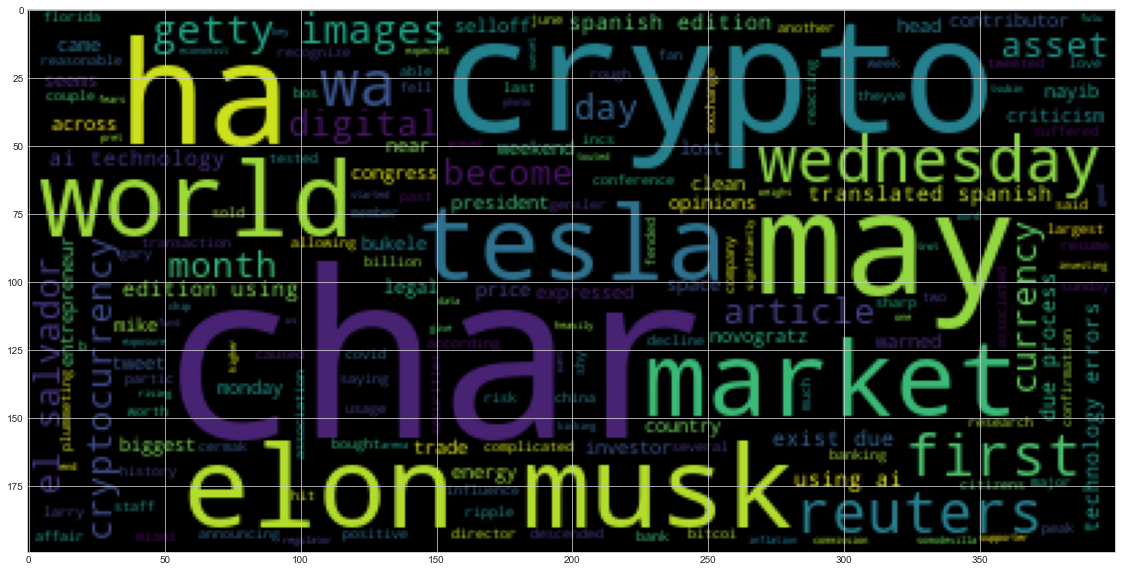

In [22]:
# Generate the Bitcoin word cloud
flat_list = []
for sublist in btc_df['Tokens']:
    for item in sublist:
        flat_list.append(item)

big_string = ' '.join(flat_list)

wc = WordCloud().generate(big_string)
plt.imshow(wc)

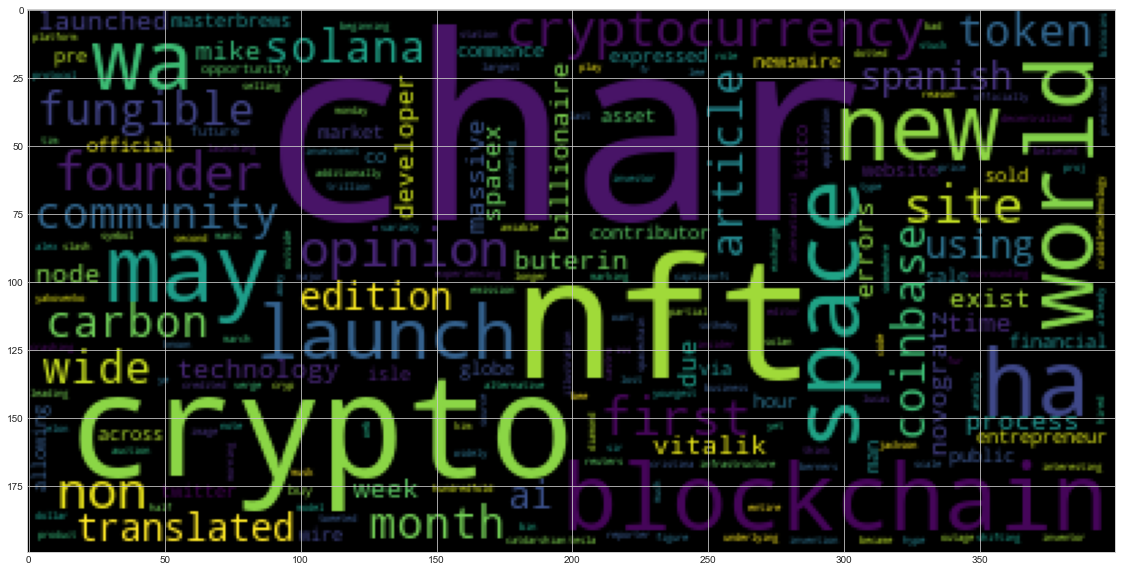

In [23]:
# Generate the Ethereum word cloud
flat_list = []
for sublist in eth_df['Tokens']:
    for item in sublist:
        flat_list.append(item)

big_string = ' '.join(flat_list)

wc = WordCloud().generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(btc_df['Text'])
bitcoin_text

"It's all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars] Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyve tested positive for covid-19. \r\nLarry Cermak, research director … [+2389 chars] El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars] That love affair between Elon Musk and Bitcoin? It's just become complicated.\xa0\r\nIt's been a rough couple of days in crypto world, with prices of most major crypto assets plummeting Bitcoin, in partic… [+6347 chars] By Reuters Staff\r\nJune 13 (Reuters) - Tesla Incs Elon Musk tweeted on Sunday that the company will resume allowing bitcoin tr

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [30]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
El Salvador GPE
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Reuters ORG
June 13 DATE
Reuters ORG
Sunday DATE
Bitcoin ORG
as much as 29% PERCENT
Wednesday DATE
the China Banking Association ORG
two-week DATE
40,000 MONEY
Monday DATE
Elon Musk PERSON
Gary Gensler PERSON
the Securities and Exchange Commission ORG
Photo PERSON
Chip Somodevilla/Getty Images ORG
US GPE
Spanish NORP
AI ORG
Elon Musk PERSON
a good month DATE
May DATE
one CARDINAL
Bitcoin PERSON
May DATE
Wednesday DATE
Getty Images ORG
Congress ORG
El Salvador GPE
first ORDINAL
Wednesday DATE
morning TIME
Nayib Bukele PERSON
recent days DATE
Elon Musk PERSON
Dado Ruvic PERSON
40,0 MONEY
Mike Novogratz PERSON
Lucas Jackson PERSON
Reuters ORG
Billionaire PERSON
Mike Novogratz PERSON
between $40,

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(eth_df['Text'])
ethereum_text

"Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars] Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars] By Cristina CriddleTechnology reporter\r\nimage captionNFT Kim Catdarshian's fur is dotted with diamonds, the symbol for cryptocurrency Ethereum\r\nThe hype surrounding NFTs (non-fungible tokens) has bee… [+6387 chars] Ethereum, the second largest cryptocurrency after bitcoin, is just months away from shifting its underlying infrastructure to a new model that would slash its carbon emissions a hundredfold, the proj… [+3301 chars] This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, Vit

In [32]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [34]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)


Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
El Salvador GPE
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Reuters ORG
June 13 DATE
Reuters ORG
Sunday DATE
Bitcoin ORG
as much as 29% PERCENT
Wednesday DATE
the China Banking Association ORG
two-week DATE
40,000 MONEY
Monday DATE
Elon Musk PERSON
Gary Gensler PERSON
the Securities and Exchange Commission ORG
Photo PERSON
Chip Somodevilla/Getty Images ORG
US GPE
Spanish NORP
AI ORG
Elon Musk PERSON
a good month DATE
May DATE
one CARDINAL
Bitcoin PERSON
May DATE
Wednesday DATE
Getty Images ORG
Congress ORG
El Salvador GPE
first ORDINAL
Wednesday DATE
morning TIME
Nayib Bukele PERSON
recent days DATE
Elon Musk PERSON
Dado Ruvic PERSON
40,0 MONEY
Mike Novogratz PERSON
Lucas Jackson PERSON
Reuters ORG
Billionaire PERSON
Mike Novogratz PERSON
between $40,

---